In [112]:
#import standard libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

In [113]:
train=pd.read_csv('/kaggle/input/google-stock-price/Google_Stock_Price_Train.csv')
traing_set=train.iloc[:,1:2].values

In [114]:
min_max=MinMaxScaler(feature_range=(0, 1))
traing_set_data=min_max.fit_transform(traing_set)

In [115]:
x_train=[]
y_train=[]
for i in range(60,1258):
    x_train.append(traing_set_data[i-60:i,0])
    y_train.append(traing_set_data[i,0])
x_train,y_train=np.array(x_train),np.array(y_train)
x_train= np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))

In [116]:
#RNN model 
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,LSTM,Dropout

In [117]:
#Modelbuliding
#Let's create model
regressor=Sequential()
#frist layer
regressor.add(LSTM(units = 50, return_sequences = True, input_shape = (x_train.shape[1], 1)))
regressor.add(Dropout(0.2))
#Second layer
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))
#Forth layer
regressor.add(LSTM(units = 50))
regressor.add(Dropout(0.2))
regressor.add(Dense(units=1))

In [118]:
#Compile the model
regressor.compile(optimizer='adam',loss='mean_squared_error')
regressor.fit(x_train,y_train,epochs=20,batch_size=32)

Epoch 1/20
38/38 [==============================] - 7s 12ms/step - loss: 0.0445
Epoch 2/20
38/38 [==============================] - 0s 11ms/step - loss: 0.0065
Epoch 3/20
38/38 [==============================] - 0s 11ms/step - loss: 0.0045
Epoch 4/20
38/38 [==============================] - 0s 11ms/step - loss: 0.0045
Epoch 5/20
38/38 [==============================] - 0s 11ms/step - loss: 0.0043
Epoch 6/20
38/38 [==============================] - 0s 11ms/step - loss: 0.0044
Epoch 7/20
38/38 [==============================] - 0s 12ms/step - loss: 0.0044
Epoch 8/20
38/38 [==============================] - 1s 14ms/step - loss: 0.0039
Epoch 9/20
38/38 [==============================] - 0s 10ms/step - loss: 0.0037
Epoch 10/20
38/38 [==============================] - 0s 11ms/step - loss: 0.0039
Epoch 11/20
38/38 [==============================] - 0s 11ms/step - loss: 0.0035
Epoch 12/20
38/38 [==============================] - 0s 11ms/step - loss: 0.0037
Epoch 13/20
38/38 [==================

In [119]:
test=pd.read_csv('/kaggle/input/google-stock-price/Google_Stock_Price_Test.csv')
test_data=test.iloc[:,1:2].values

In [120]:
test.head()

,Date,Open,High,Low,Close,Volume
0,1/3/2017,778.81,789.63,775.80,786.14,"1,657,300"
1,1/4/2017,788.36,791.34,783.16,786.90,"1,073,000"
2,1/5/2017,786.08,794.48,785.02,794.02,"1,335,200"
3,1/6/2017,795.26,807.90,792.20,806.15,"1,640,200"
4,1/9/2017,806.40,809.97,802.83,806.65,"1,272,400"


In [121]:
final_df=pd.concat((train['Open'],test['Open']),axis=0)
inputs=final_df[len(final_df)-len(test)- 60:].values
inputs=inputs.reshape(-1,1)
inputs=min_max.transform(inputs)

In [122]:
x_test=[]
y_test=[]
for i in range(60,80):
    x_test.append(inputs[i-60 : i,0])
    y_test.append(inputs[i,0])
x_test,y_test=np.array(x_test),np.array(y_test)
x_test= np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

In [123]:
preidct=regressor.predict(x_test)
y_prediction=min_max.inverse_transform(preidct)

1/1 [==============================] - 1s 989ms/step


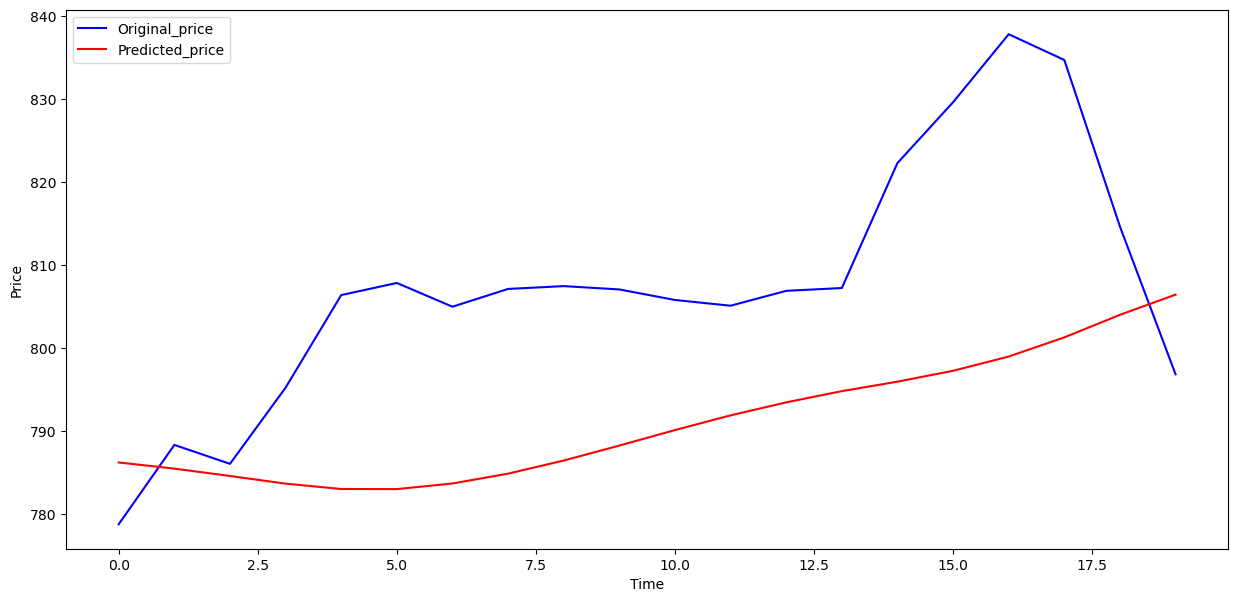

In [124]:
plt.figure(figsize=(15,7))
plt.plot(test_data,'blue',label="Original_price")
plt.plot(y_prediction,'red',label="Predicted_price")
plt.xlabel("Time")
plt.ylabel("Price")
plt.legend()
plt.show()
